#### 4️⃣ 🎨 Visualization

<small>

📊 **Goal:** Communicate findings visually.

- Histogram: Age, studytime, absences.
- Boxplot/Violin: G3 vs studytime / schoolsup.
- Scatterplot: Absences vs G3 (+ insights).
- Heatmap: Correlation matrix of numeric variables.

---


In [2]:
# ===============================
# 📚 Essential Libraries for Project
# ===============================

# Data handling
import pandas as pd
import numpy as np

# Fetch UCI ML Repository datasets
# from ucimlrepo import fetch_ucirepo

# Data visualization
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec

import seaborn as sns
import plotly.express as px

import plotly.graph_objects as go
# import missingno as msno

# Handle Warning
import warnings

warnings.filterwarnings("ignore")


# Machine Learning (Supervised & Unsupervised)
from sklearn.model_selection import (
    train_test_split,
    cross_val_score,
    GridSearchCV,
    RandomizedSearchCV,
)
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import (
    LogisticRegression,
    LinearRegression,
    Ridge,
    Lasso,
    ElasticNet,
)
from sklearn.ensemble import (
    RandomForestClassifier,
    RandomForestRegressor,
    AdaBoostRegressor,
)
from sklearn.svm import SVC, SVR
from sklearn.cluster import KMeans
from sklearn.metrics import (
    accuracy_score,
    confusion_matrix,
    classification_report,
    silhouette_score,
    make_scorer,
    f1_score,
    precision_score,
    recall_score,
    mean_squared_error,
    r2_score,
    mean_absolute_error,
)


from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from xgboost import XGBRegressor

# Dimensionality Reduction & Feature Selection
from sklearn.decomposition import PCA
from sklearn.feature_selection import SelectKBest, chi2

# Stats & Hypothesis Testing
import scipy.stats as stats
from scipy.stats import chi2_contingency, ttest_ind, f_oneway

# Dashboard
import streamlit as st

# Save Models
from joblib import dump, loada
from pickle import dump, load


# Set style for consistent plotting
plt.style.use("default")
sns.set_palette("husl")
plt.rcParams["figure.figsize"] = (12, 8)

ImportError: cannot import name 'loada' from 'joblib' (C:\Users\Mohamed Yasser\AppData\Roaming\Python\Python312\site-packages\joblib\__init__.py)

In [3]:
# Load data
df = pd.read_csv("data-set/student_data_no_leakage.csv")

In [4]:
df.head()

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,...,higher_yes,internet_yes,romantic_yes,attendance_rate,pass_binary,risk_category,study_efficiency,has_failures,family_edu_avg,family_edu_max
0,18,4,4,2,2,0,4,3,4,1,...,True,False,False,0.733333,1,Medium_Risk,2.444444,0,4.0,4
1,17,1,1,1,2,0,5,3,3,1,...,True,True,False,0.866667,1,Medium_Risk,3.444444,0,1.0,1
2,15,1,1,1,2,0,4,3,2,2,...,True,True,False,0.600000,1,Medium_Risk,4.111111,0,1.0,1
3,15,4,2,1,3,0,3,2,2,1,...,True,True,True,1.000000,1,Low_Risk,3.500000,0,3.0,4
4,16,3,3,1,2,0,4,3,2,1,...,True,False,False,1.000000,1,Medium_Risk,4.111111,0,3.0,3


4.1 HISTOGRAMS OF NUMERIC VARIABLES


In [5]:
# Select 4 key numeric variables for histograms
numeric_vars = ["age", "studytime", "absences", "G3"]
available_vars = [var for var in numeric_vars if var in df.columns]

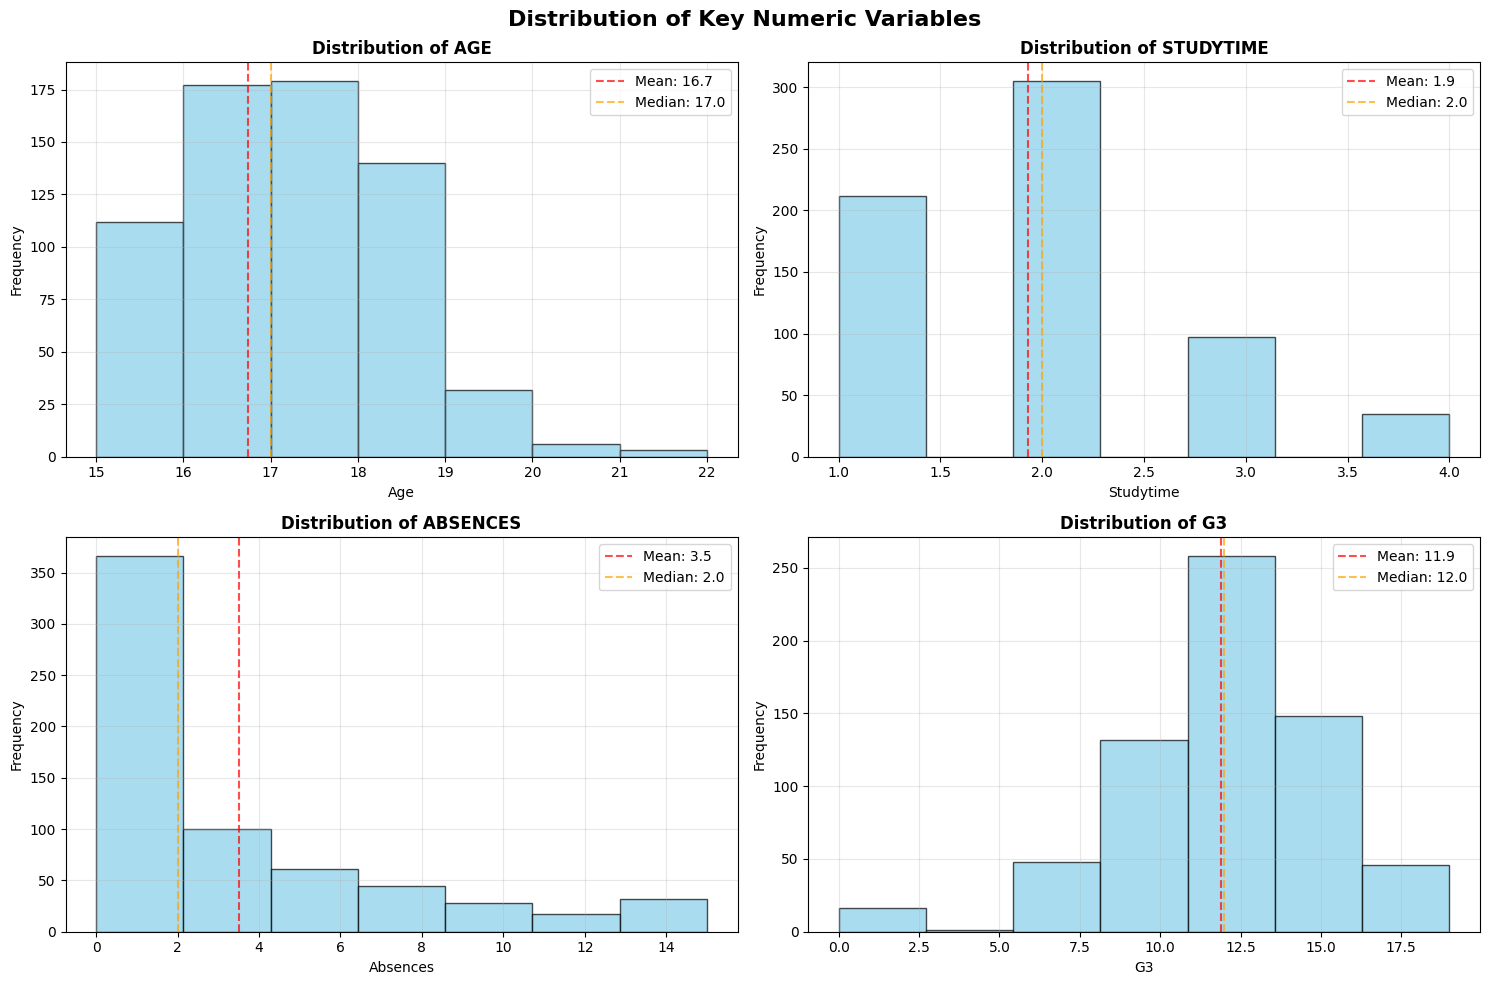

In [6]:
if len(available_vars) >= 3:
    fig, axes = plt.subplots(2, 2, figsize=(15, 10))
    fig.suptitle(
        "Distribution of Key Numeric Variables", fontsize=16, fontweight="bold"
    )

    for i, var in enumerate(available_vars[:4]):
        row, col = i // 2, i % 2
        ax = axes[row, col]

        # Create histogram with KDE
        df[var].hist(bins=7, alpha=0.7, color="skyblue", edgecolor="black", ax=ax)

        # Add statistics
        mean_val = df[var].mean()
        median_val = df[var].median()
        ax.axvline(
            mean_val,
            color="red",
            linestyle="--",
            alpha=0.7,
            label=f"Mean: {mean_val:.1f}",
        )
        ax.axvline(
            median_val,
            color="orange",
            linestyle="--",
            alpha=0.7,
            label=f"Median: {median_val:.1f}",
        )

        ax.set_title(f"Distribution of {var.upper()}", fontweight="bold")
        ax.set_xlabel(var.replace("_", " ").title())
        ax.set_ylabel("Frequency")
        ax.legend()
        ax.grid(True, alpha=0.3)

    # Remove empty subplot if we have only 3 variables
    if len(available_vars) == 3:
        fig.delaxes(axes[1, 1])

    plt.tight_layout()
    plt.savefig("histograms_numeric_variables.png", dpi=300, bbox_inches="tight")
    plt.show()

4.2 BOXPLOT: G3 ACROSS STUDY TIME


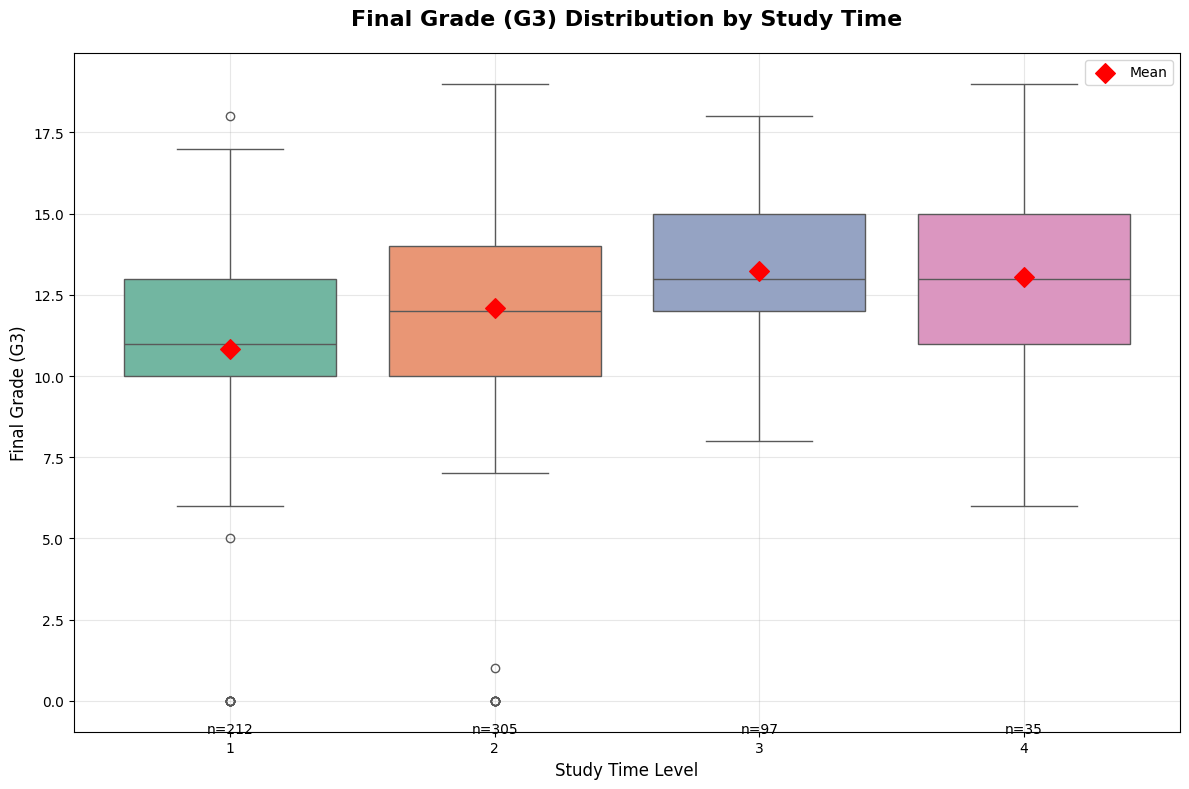

In [ ]:
plt.figure(figsize=(12, 8))

# Create boxplot
box_plot = sns.boxplot(data=df, x="studytime", y="G3", palette="Set2")

# Add mean points
means = df.groupby("studytime")["G3"].mean()
for i, mean_val in enumerate(means):
    plt.scatter(
        i,
        mean_val,
        color="red",
        s=100,
        marker="D",
        zorder=5,
        label="Mean" if i == 0 else "",
    )

# Customize plot
plt.title(
    "Final Grade (G3) Distribution by Study Time",
    fontsize=16,
    fontweight="bold",
    pad=20,
)
plt.xlabel("Study Time Level", fontsize=12)
plt.ylabel("Final Grade (G3)", fontsize=12)

# Add sample sizes
for i, study_level in enumerate(sorted(df["studytime"].unique())):
    count = len(df[df["studytime"] == study_level])
    plt.text(i, df["G3"].min() - 1, f"n={count}", ha="center", fontsize=10)

plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.savefig("boxplot_g3_by_studytime.png", dpi=300, bbox_inches="tight")
plt.show()

In [8]:
# Statistical summary
print("\nStudy Time vs G3 Summary:")
study_summary = (
    df.groupby("studytime")["G3"].agg(["count", "mean", "median", "std"]).round(2)
)
print(study_summary.to_string())


Study Time vs G3 Summary:
           count   mean  median   std
studytime                            
1            212  10.84    11.0  3.22
2            305  12.09    12.0  3.24
3             97  13.23    13.0  2.50
4             35  13.06    13.0  3.04


4.3 SCATTERPLOT: ABSENCES VS G3


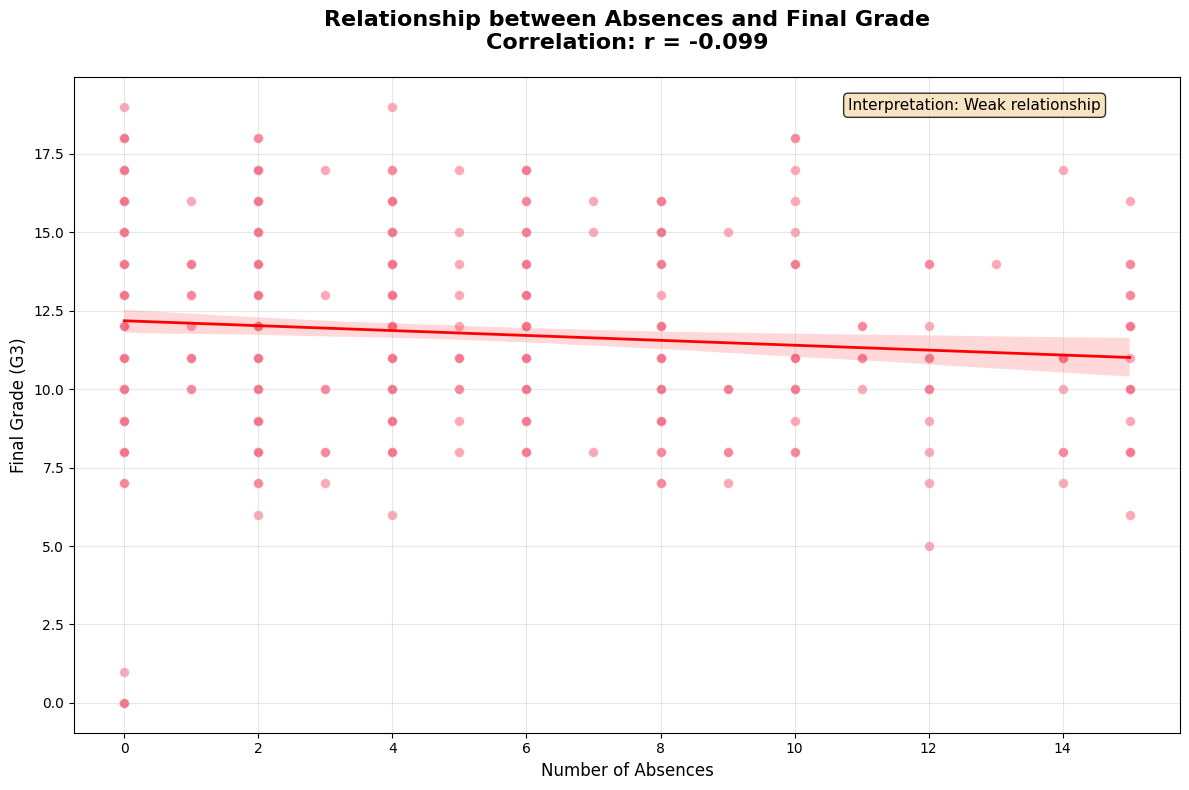

In [ ]:
plt.figure(figsize=(12, 8))

# Create scatter plot with regression line
sns.scatterplot(data=df, x="absences", y="G3", alpha=0.6, s=50)
sns.regplot(
    data=df, x="absences", y="G3", scatter=False, color="red", line_kws={"linewidth": 2}
)

# Calculate correlation
correlation = df["absences"].corr(df["G3"])

plt.title(
    f"Relationship between Absences and Final Grade\nCorrelation: r = {correlation:.3f}",
    fontsize=16,
    fontweight="bold",
    pad=20,
)
plt.xlabel("Number of Absences", fontsize=12)
plt.ylabel("Final Grade (G3)", fontsize=12)

# Add interpretation text
if correlation < -0.3:
    interpretation = "Strong negative relationship"
elif correlation < -0.1:
    interpretation = "Moderate negative relationship"
else:
    interpretation = "Weak relationship"

plt.text(
    0.7,
    0.95,
    f"Interpretation: {interpretation}",
    transform=plt.gca().transAxes,
    fontsize=11,
    bbox=dict(boxstyle="round", facecolor="wheat", alpha=0.8),
)

plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.savefig("scatterplot_absences_vs_g3.png", dpi=300, bbox_inches="tight")
plt.show()

In [10]:
# Statistical interpretation
print(f"\nAbsences vs G3 Analysis:")
print(f"- Correlation coefficient: {correlation:.3f}")
print(f"- Interpretation: {interpretation}")
if correlation < -0.2:
    print("- Higher absences are associated with lower grades")
else:
    print("- Absences show weak relationship with grades")


Absences vs G3 Analysis:
- Correlation coefficient: -0.099
- Interpretation: Weak relationship
- Absences show weak relationship with grades


4.4 CORRELATION HEATMAP


In [11]:
# Select numeric columns for correlation analysis
numeric_cols = df.select_dtypes(include=["int64", "float64"]).columns.tolist()

In [12]:
# Focus on most relevant columns (limit to prevent overcrowding)
key_numeric_cols = [
    col
    for col in numeric_cols
    if col
    in [
        "age",
        "studytime",
        "failures",
        "freetime",
        "goout",
        "absences",
        "G3",
        "attendance_rate",
        "study_efficiency",
        "family_edu_avg",
        "family_edu_max",
    ]
]

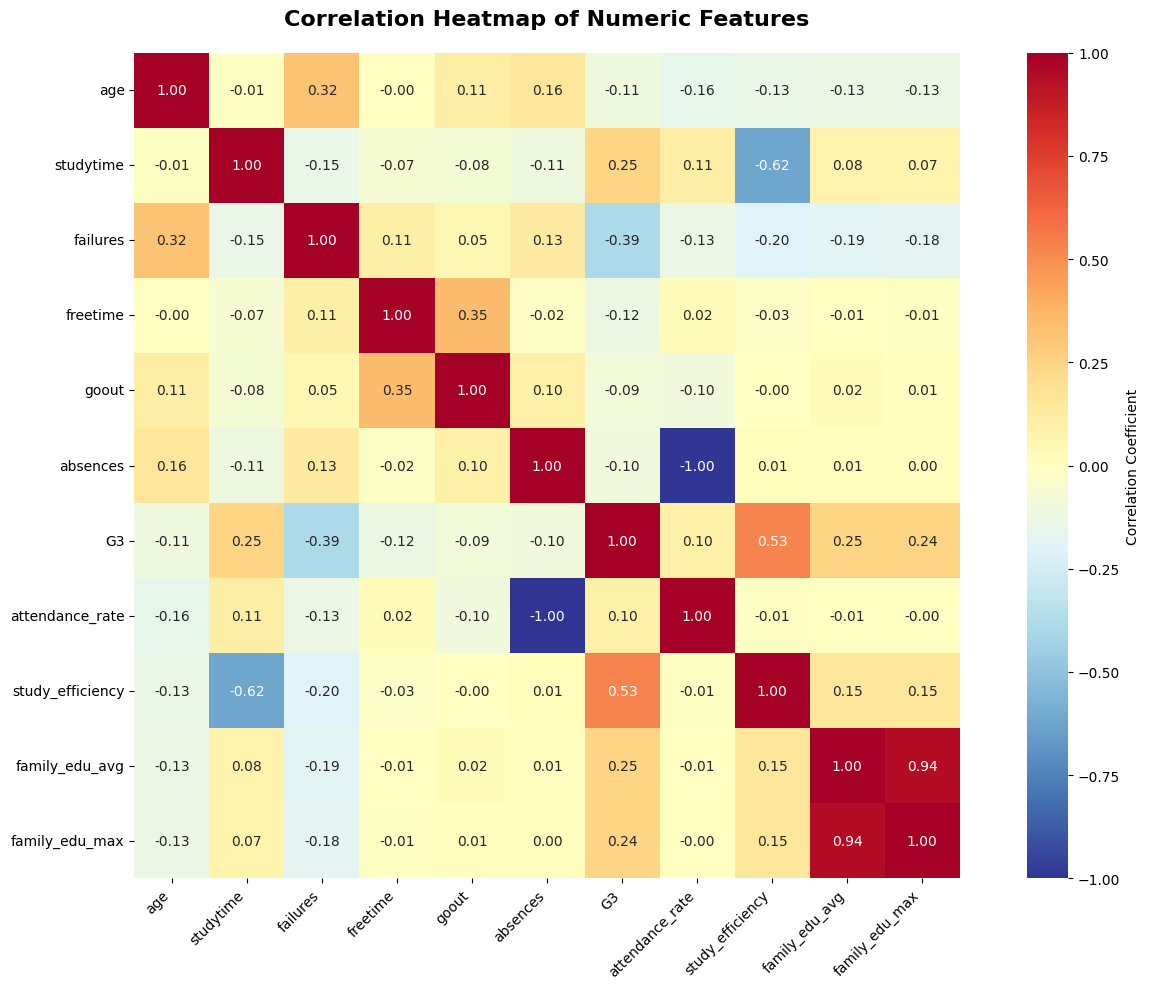


Strongest correlations with G3:
  • study_efficiency: +0.528
  • failures: -0.393
  • studytime: +0.250
  • family_edu_avg: +0.249
  • family_edu_max: +0.244


In [13]:
if len(key_numeric_cols) >= 5:
    plt.figure(figsize=(14, 10))

    # Calculate correlation matrix
    corr_matrix = df[key_numeric_cols].corr()

    # Create mask for upper triangle (optional)
    mask = np.triu(np.ones_like(corr_matrix, dtype=bool))

    # Create heatmap
    sns.heatmap(
        corr_matrix,
        annot=True,
        cmap="RdYlBu_r",
        center=0,
        square=True,
        fmt=".2f",
        cbar_kws={"label": "Correlation Coefficient"},
        mask=None,
    )  # Remove mask to show full matrix

    plt.title(
        "Correlation Heatmap of Numeric Features",
        fontsize=16,
        fontweight="bold",
        pad=20,
    )
    plt.xticks(rotation=45, ha="right")
    plt.yticks(rotation=0)
    plt.tight_layout()
    plt.savefig("correlation_heatmap.png", dpi=300, bbox_inches="tight")
    plt.show()

    # Highlight strongest correlations with G3
    if "G3" in corr_matrix.columns:
        g3_corrs = corr_matrix["G3"].drop("G3").abs().sort_values(ascending=False)
        print(f"\nStrongest correlations with G3:")
        for var, corr in g3_corrs.head(5).items():
            direction = "+" if corr_matrix["G3"][var] > 0 else "-"
            print(f"  • {var}: {direction}{corr:.3f}")

4.6 ADDITIONAL VISUALIZATIONS


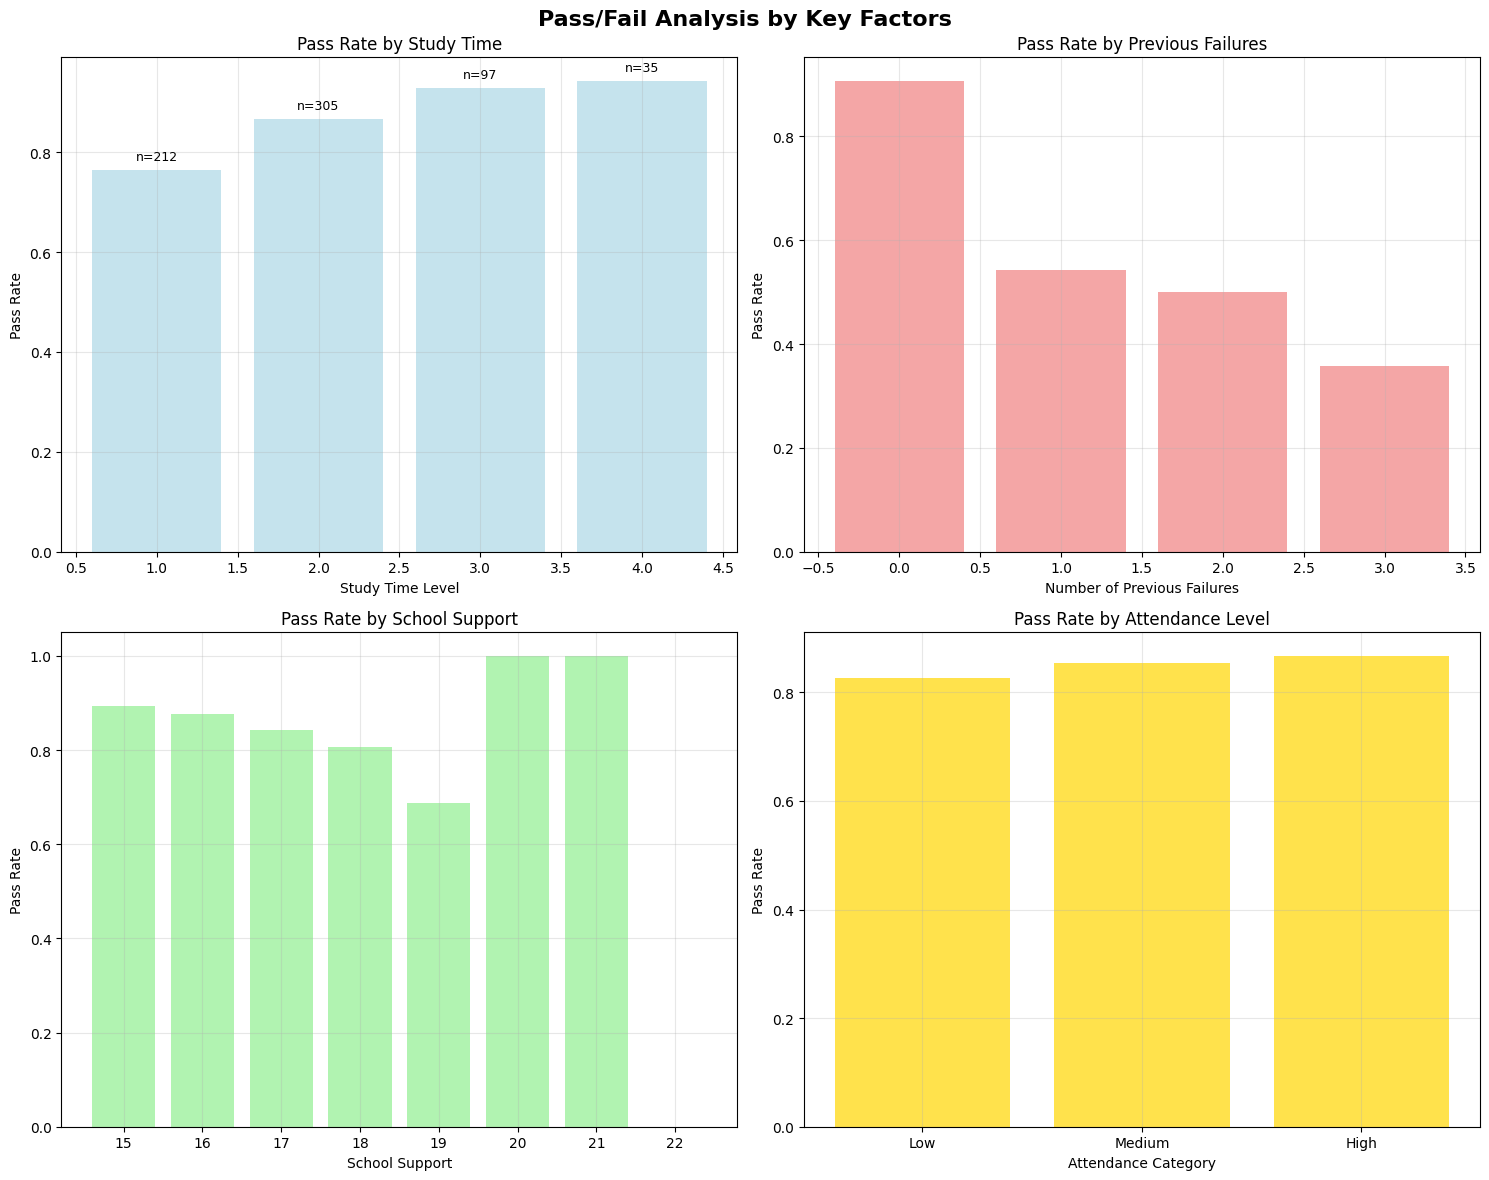

In [ ]:
# A. Pass/Fail distribution by key factors
fig, axes = plt.subplots(2, 2, figsize=(15, 12))
fig.suptitle("Pass/Fail Analysis by Key Factors", fontsize=16, fontweight="bold")

# Study time
pass_rates = df.groupby("studytime")["pass_binary"].agg(["count", "mean"]).round(3)
axes[0, 0].bar(pass_rates.index, pass_rates["mean"], alpha=0.7, color="lightblue")
axes[0, 0].set_title("Pass Rate by Study Time")
axes[0, 0].set_xlabel("Study Time Level")
axes[0, 0].set_ylabel("Pass Rate")
axes[0, 0].grid(True, alpha=0.3)

# Add sample sizes
for i, (idx, row) in enumerate(pass_rates.iterrows()):
    axes[0, 0].text(
        idx,
        row["mean"] + 0.02,
        f'n={int(row["count"])}',
        ha="center",
        fontsize=9,
    )

# Failures
failure_pass_rates = (
    df.groupby("failures")["pass_binary"].agg(["count", "mean"]).round(3)
)
axes[0, 1].bar(
    failure_pass_rates.index,
    failure_pass_rates["mean"],
    alpha=0.7,
    color="lightcoral",
)
axes[0, 1].set_title("Pass Rate by Previous Failures")
axes[0, 1].set_xlabel("Number of Previous Failures")
axes[0, 1].set_ylabel("Pass Rate")
axes[0, 1].grid(True, alpha=0.3)

# School support (if available)
school_support_col = None
for col in df.columns:
    school_support_col = col
    break

support_rates = df.groupby(school_support_col)["pass_binary"].mean()
axes[1, 0].bar(support_rates.index, support_rates.values, alpha=0.7, color="lightgreen")
axes[1, 0].set_title("Pass Rate by School Support")
axes[1, 0].set_xlabel("School Support")
axes[1, 0].set_ylabel("Pass Rate")
axes[1, 0].grid(True, alpha=0.3)

# Attendance rate (if available)
# Create attendance categories
df["attendance_category"] = pd.cut(
    df["attendance_rate"],
    bins=[0, 0.8, 0.9, 1.0],
    labels=["Low", "Medium", "High"],
)
attend_rates = df.groupby("attendance_category")["pass_binary"].mean()
axes[1, 1].bar(attend_rates.index, attend_rates.values, alpha=0.7, color="gold")
axes[1, 1].set_title("Pass Rate by Attendance Level")
axes[1, 1].set_xlabel("Attendance Category")
axes[1, 1].set_ylabel("Pass Rate")
axes[1, 1].grid(True, alpha=0.3)

plt.tight_layout()
plt.savefig("pass_fail_analysis.png", dpi=300, bbox_inches="tight")
plt.show()

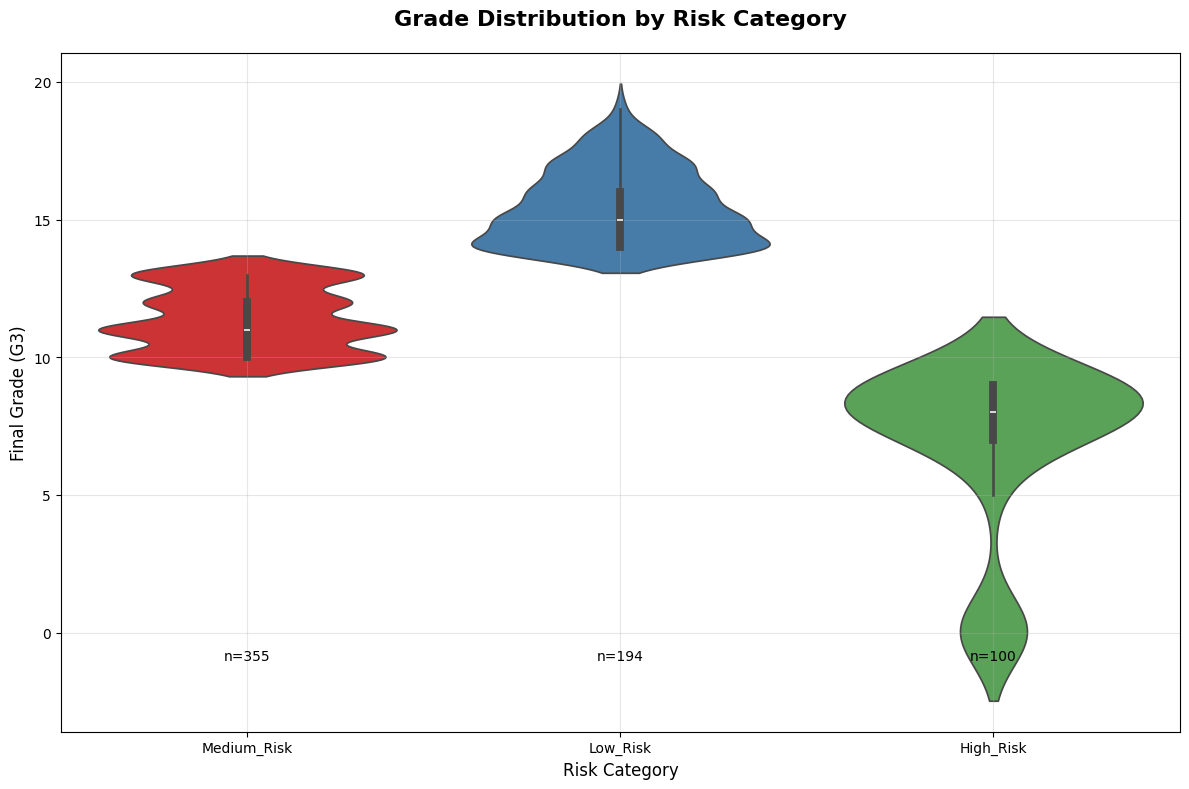

In [ ]:
plt.figure(figsize=(12, 8))

# Violin plot showing grade distributions by risk category
sns.violinplot(data=df, x="risk_category", y="G3", palette="Set1")

plt.title("Grade Distribution by Risk Category", fontsize=16, fontweight="bold", pad=20)
plt.xlabel("Risk Category", fontsize=12)
plt.ylabel("Final Grade (G3)", fontsize=12)

# Add sample sizes
for i, category in enumerate(df["risk_category"].unique()):
    count = len(df[df["risk_category"] == category])
    plt.text(i, df["G3"].min() - 1, f"n={count}", ha="center", fontsize=10)

plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.savefig("grade_distribution_by_risk.png", dpi=300, bbox_inches="tight")
plt.show()

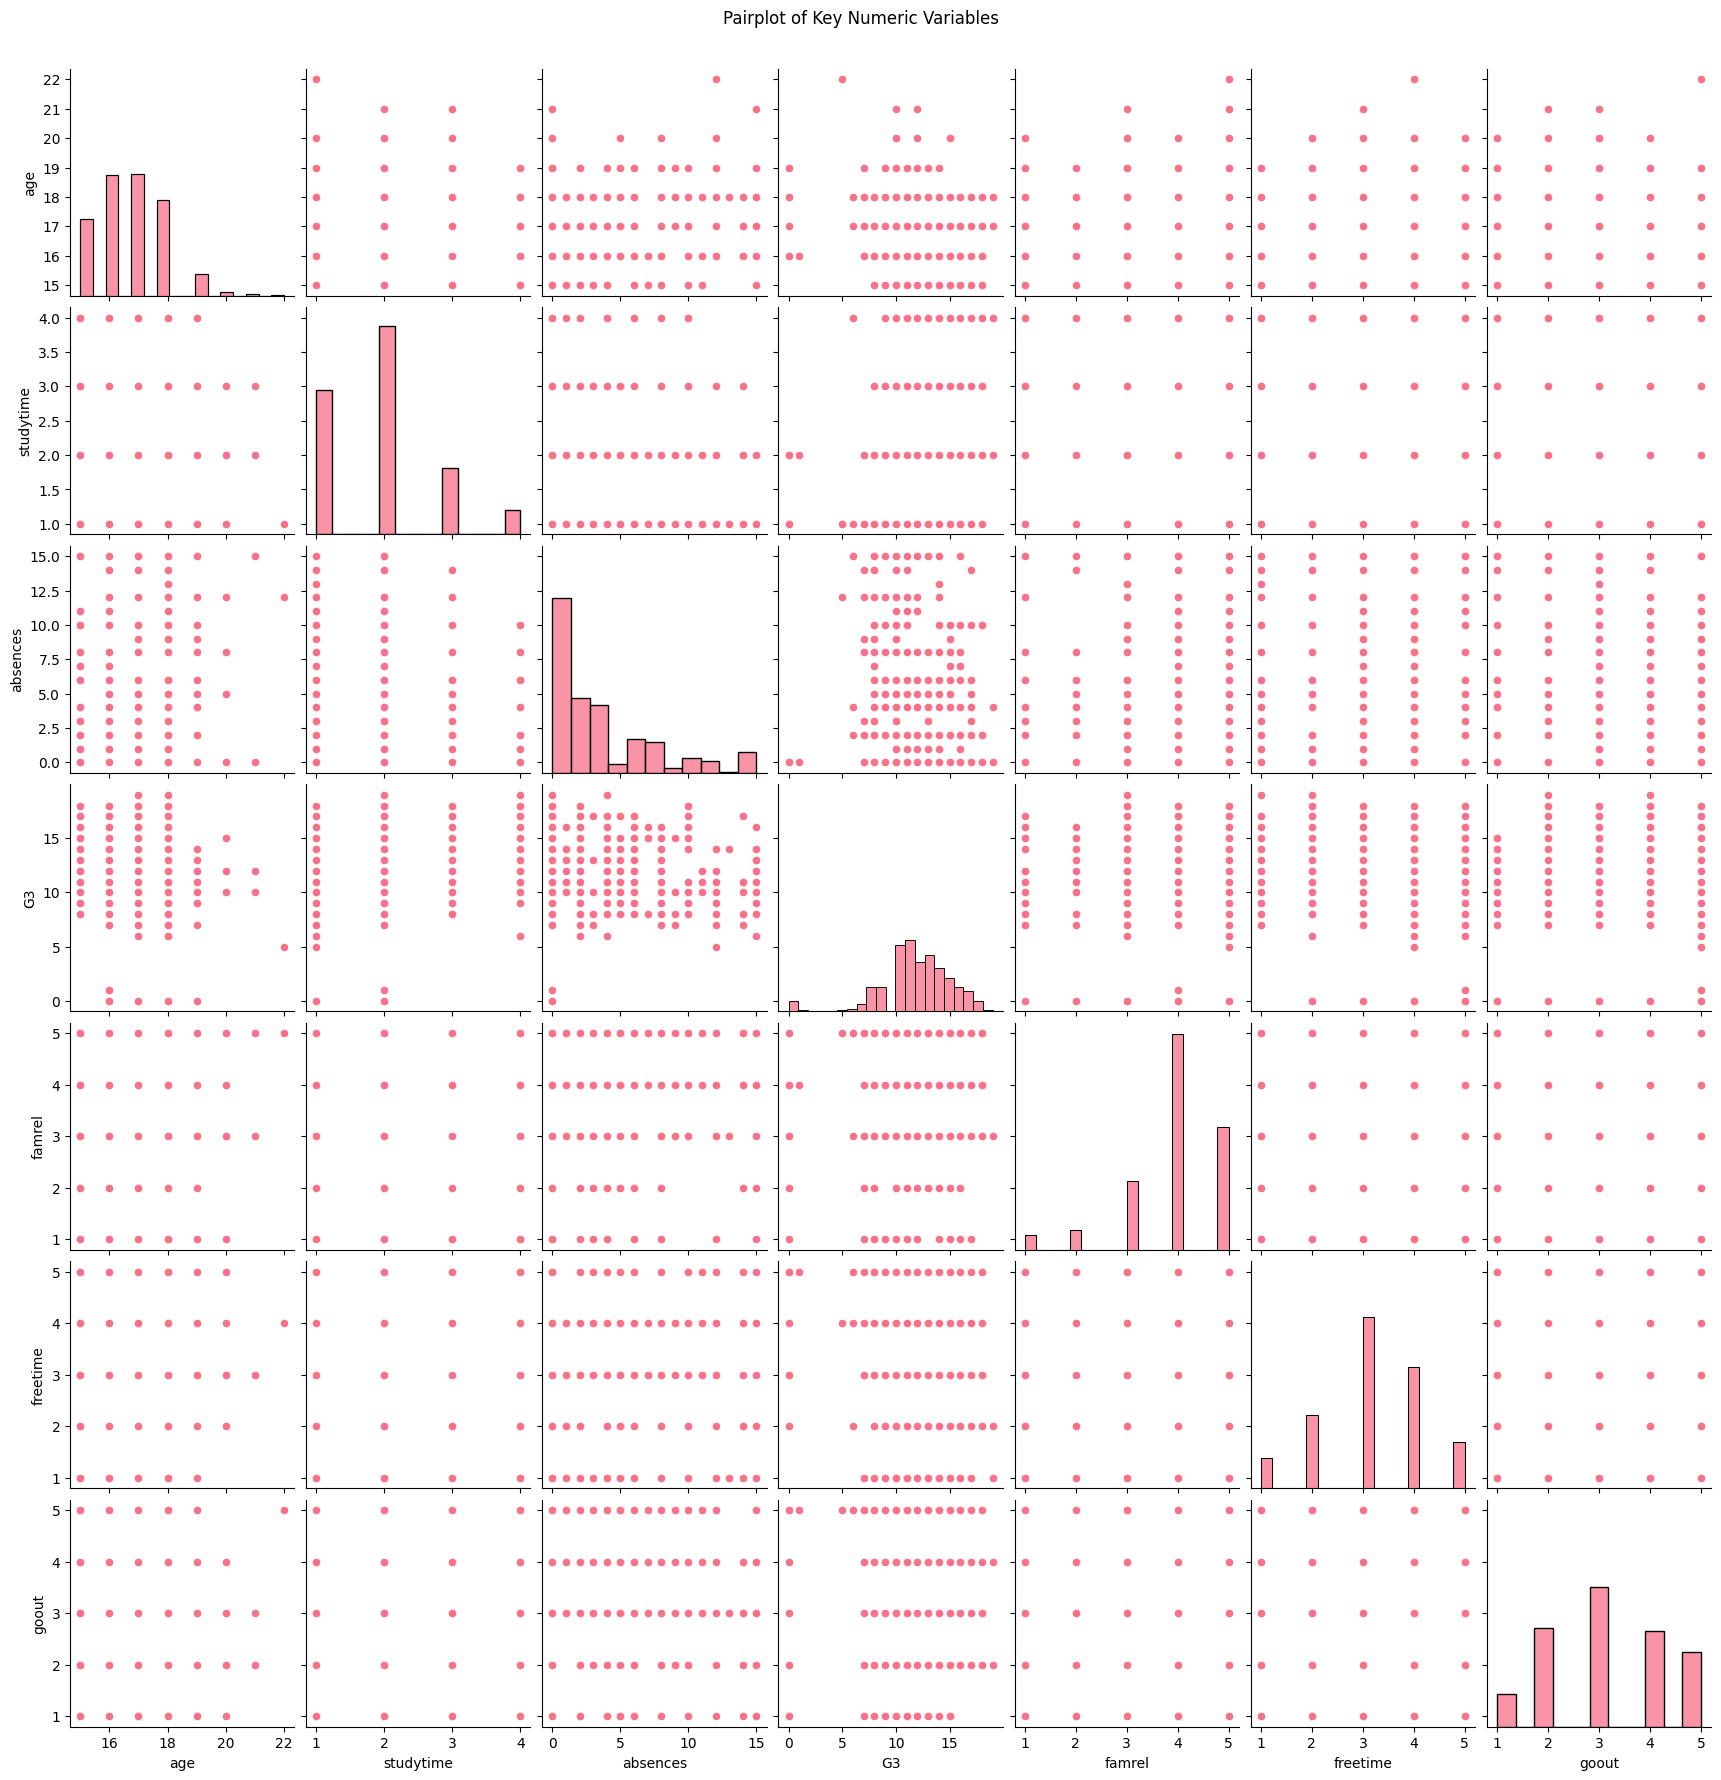

In [ ]:
# Pairplot for multiple numeric variables
numeric_vars_extended = [
    "age",
    "studytime",
    "absences",
    "G3",
    "famrel",
    "freetime",
    "goout",
]

sns.pairplot(df[numeric_vars_extended], diag_kind="hist")
plt.suptitle("Pairplot of Key Numeric Variables", y=1.02)
plt.savefig("pairplot_numeric_variables.png", dpi=300, bbox_inches="tight")
plt.show()

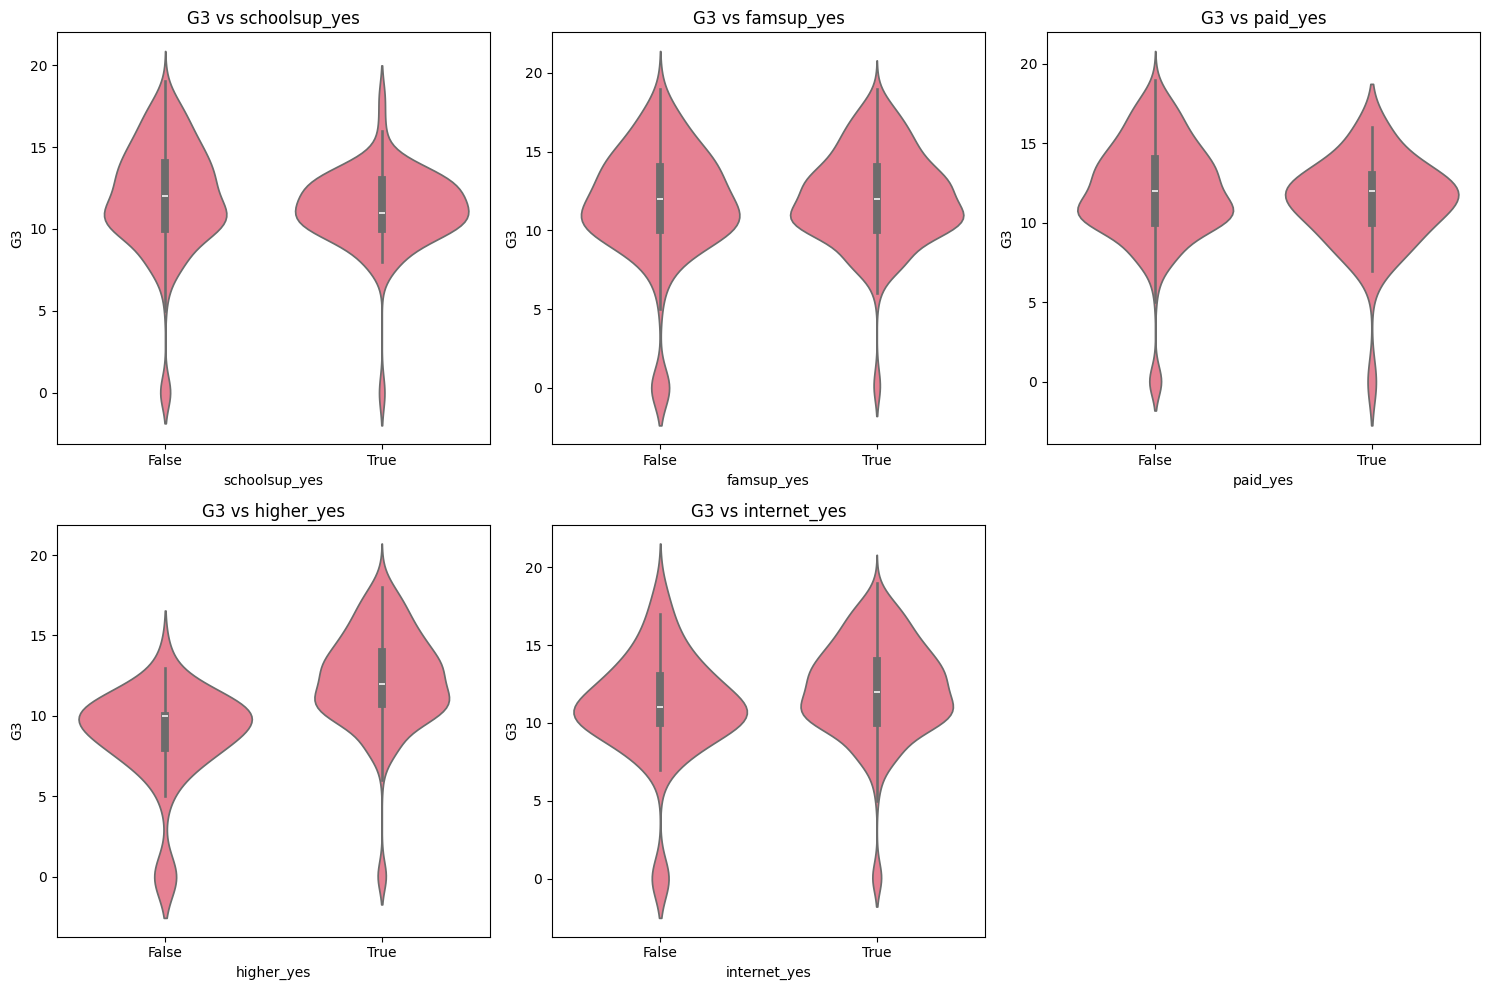

In [50]:
# Violin plots for multiple categorical variables vs G3
categorical_vars = [
    "schoolsup_yes",
    "famsup_yes",
    "paid_yes",
    "higher_yes",
    "internet_yes",
]

fig, axes = plt.subplots(2, 3, figsize=(15, 10))
axes = axes.flatten()

for i, var in enumerate(categorical_vars):
    sns.violinplot(x=var, y="G3", data=df, ax=axes[i])
    axes[i].set_title(f"G3 vs {var}")

# Remove empty subplot if needed
if len(categorical_vars) < 6:
    fig.delaxes(axes[-1])

plt.tight_layout()
plt.savefig("violin_plots_categorical_variables.png", dpi=300, bbox_inches="tight")
plt.show()

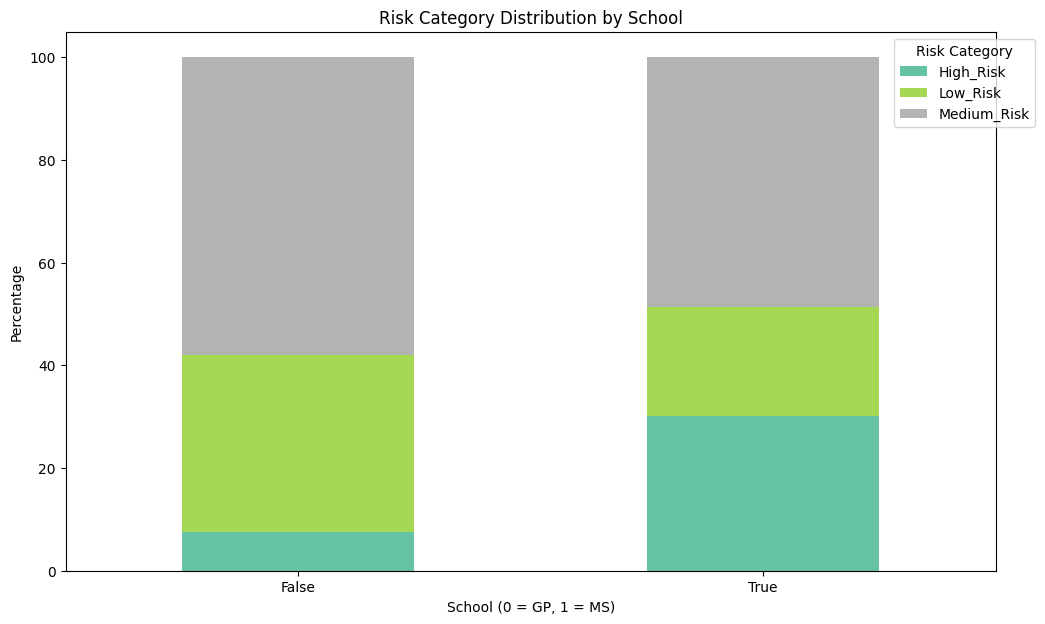

In [54]:
# Stacked bar chart for risk categories by school
risk_by_school = (
    pd.crosstab(df["school_MS"], df["risk_category"], normalize="index") * 100
)

# Plot with a colormap
risk_by_school.plot(
    kind="bar",
    stacked=True,
    figsize=(12, 7),
    colormap="Set2",
)

plt.title("Risk Category Distribution by School")
plt.xlabel("School (0 = GP, 1 = MS)")
plt.ylabel("Percentage")
plt.legend(title="Risk Category", bbox_to_anchor=(1.05, 1))
plt.savefig("risk_category_by_school.png", dpi=300, bbox_inches="tight")
plt.xticks(rotation=0)
plt.show()

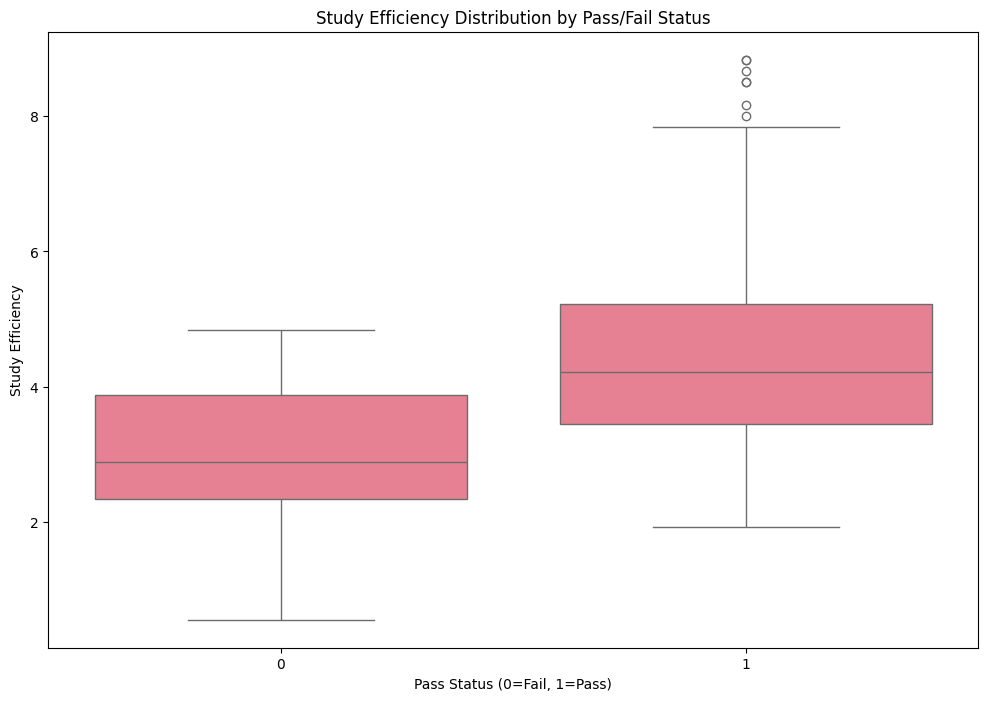

In [58]:
# Boxplot of study efficiency by pass status
plt.figure(figsize=(12, 8))
sns.boxplot(x="pass_binary", y="study_efficiency", data=df)
plt.title("Study Efficiency Distribution by Pass/Fail Status")
plt.xlabel("Pass Status (0=Fail, 1=Pass)")
plt.ylabel("Study Efficiency")
plt.savefig("boxplot_study_efficiency_by_pass_status.png", dpi=300, bbox_inches="tight")
plt.show()

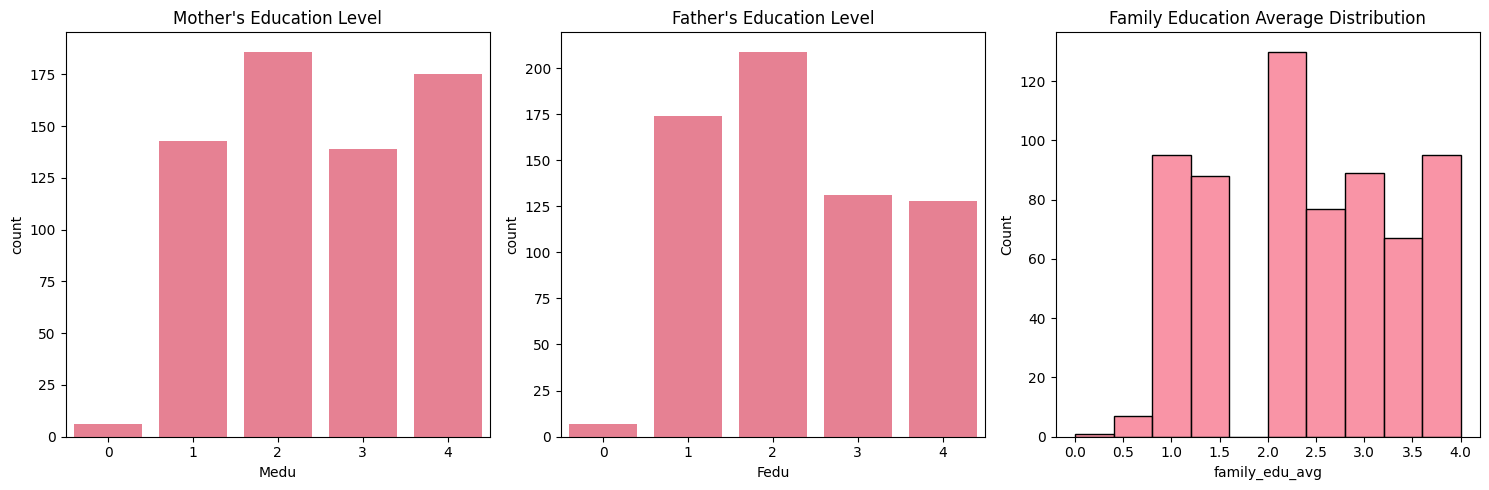

<Figure size 1200x800 with 0 Axes>

In [61]:
# Distribution of family education metrics
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

# Mother's education
sns.countplot(x="Medu", data=df, ax=axes[0])
axes[0].set_title("Mother's Education Level")

# Father's education
sns.countplot(x="Fedu", data=df, ax=axes[1])
axes[1].set_title("Father's Education Level")

# Family education average
sns.histplot(df["family_edu_avg"], bins=10, ax=axes[2])
axes[2].set_title("Family Education Average Distribution")

plt.tight_layout()
plt.show()

plt.savefig("family_education_metrics.png", dpi=300, bbox_inches="tight")

In [71]:
# Interactive scatter plot with Plotly
fig = px.scatter(
    df,
    x="studytime",
    y="G3",
    color="school_MS",
    size="absences",
    hover_data=["age", "sex_M"],
    title="Interactive Scatter: Study Time vs Final Grade",
    labels={"studytime": "Study Time", "G3": "Final Grade", "school_MS": "School (MS)"},
    color_discrete_sequence=px.colors.qualitative.Set2,
)
fig.show()

fig.write_image("interactive_scatter_studytime_vs_g3.png", scale=2)

In [ ]:
def create_radar_chart(category, title):
    # Features to compare
    features = ["studytime", "freetime", "goout", "Dalc", "Walc", "health"]

    # Calculate mean values per category
    stats = df.groupby(category)[features].mean().reset_index()

    # Handle angles
    N = len(features)
    angles = np.linspace(0, 2 * np.pi, N, endpoint=False).tolist()
    angles += angles[:1]  # close the loop

    # Create polar plot
    fig, ax = plt.subplots(figsize=(8, 8), subplot_kw=dict(polar=True))

    for i, row in stats.iterrows():
        values = row[features].tolist()
        values += values[:1]  # close the loop

        # Use label mapping if binary category
        label = row[category]
        if category == "school_MS":
            label = "MS" if label == 1 else "GP"

        ax.plot(angles, values, linewidth=2, label=label)
        ax.fill(angles, values, alpha=0.25)

    # Add feature labels
    ax.set_thetagrids(np.degrees(angles[:-1]), features)

    # Formatting
    ax.set_title(title, size=14, pad=20)
    ax.grid(True)

    # Put legend outside the chart
    ax.legend(loc="upper right", bbox_to_anchor=(1.2, 1.1))
    plt.savefig("radar_chart.png", dpi=300, bbox_inches="tight")

    plt.show()

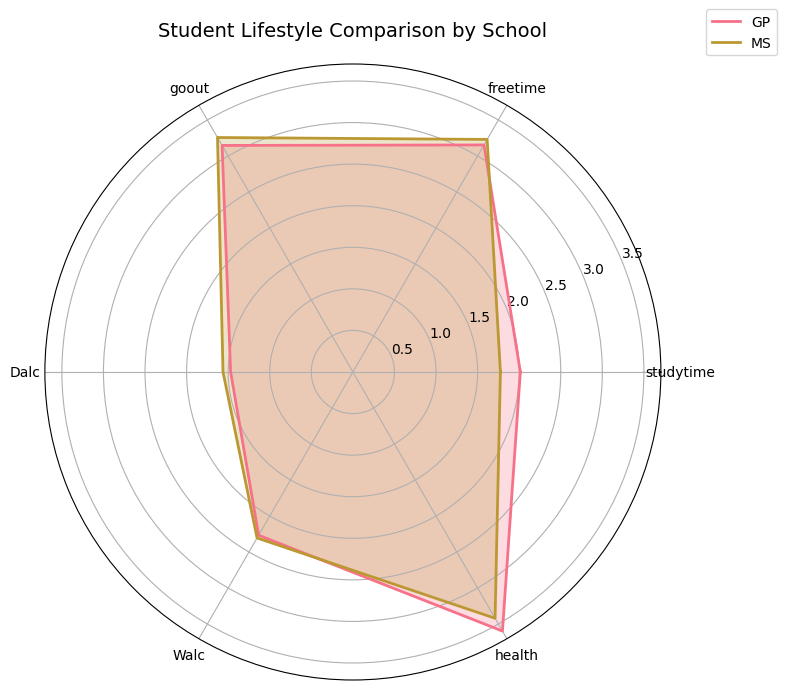

In [78]:
# Example usage
create_radar_chart("school_MS", "Student Lifestyle Comparison by School")

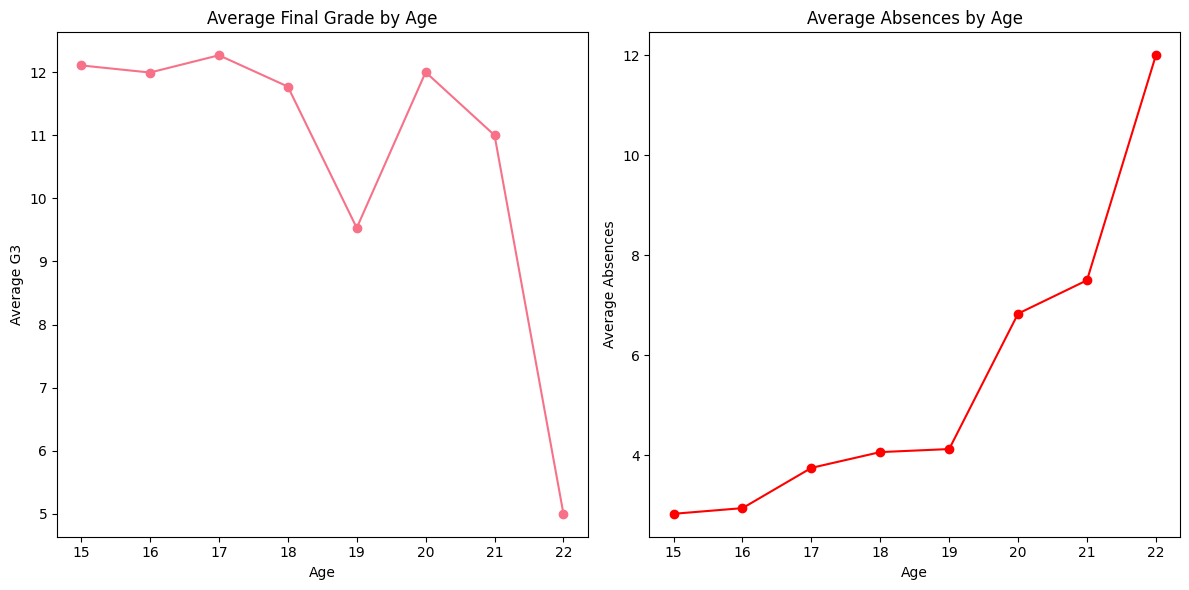

<Figure size 1200x800 with 0 Axes>

In [76]:
plt.figure(figsize=(12, 6))

# G3 by age
age_g3 = df.groupby("age")["G3"].mean()
plt.subplot(1, 2, 1)
plt.plot(age_g3.index, age_g3.values, marker="o")
plt.title("Average Final Grade by Age")
plt.xlabel("Age")
plt.ylabel("Average G3")

# Absences by age
age_absences = df.groupby("age")["absences"].mean()
plt.subplot(1, 2, 2)
plt.plot(age_absences.index, age_absences.values, marker="o", color="red")
plt.title("Average Absences by Age")
plt.xlabel("Age")
plt.ylabel("Average Absences")

plt.tight_layout()
plt.show()

plt.savefig("age_vs_g3_absences.png", dpi=300, bbox_inches="tight")

In [82]:
# Interactive 3D scatter plot

# Map binary to descriptive labels
df["pass_status_label"] = df["pass_binary"].map({0: "Fail", 1: "Pass"})

fig = px.scatter_3d(
    df,
    x="studytime",
    y="absences",
    z="G3",
    color="pass_status_label",  # clearer labels
    size="age",
    size_max=20,  # controls bubble scaling
    hover_data=["sex_M", "school_MS", "family_edu_avg"],
    title="3D Visualization: Study Time vs Absences vs Final Grade",
    labels={
        "studytime": "Study Time",
        "absences": "Absences",
        "G3": "Final Grade",
        "pass_status_label": "Pass Status",
    },
    color_discrete_map={"Fail": "red", "Pass": "green"},  # better colors
)

fig.update_traces(marker=dict(opacity=0.6))  # make points slightly transparent
fig.show()

In [84]:
# Interactive parallel coordinates plot
fig = px.parallel_coordinates(
    df,
    color="G3",
    dimensions=["age", "studytime", "absences", "famrel", "G3"],
    color_continuous_scale=px.colors.diverging.Tealrose,
    title="Parallel Coordinates: Student Characteristics vs Final Grade",
)
fig.show()

fig.write_image("parallel_coordinates.png", scale=2)

In [ ]:
# Map binary to descriptive labels
df["pass_status_label"] = df["pass_binary"].map({0: "Fail", 1: "Pass"})

fig = px.scatter(
    df,
    x="studytime",
    y="G3",
    animation_frame="age",
    color="pass_status_label",
    size="absences",
    hover_name="risk_category",
    range_x=[0, 4],
    range_y=[0, 20],
    title="Animated: Study Time vs Final Grade by Age",
    color_discrete_map={"Fail": "red", "Pass": "green"},
)

fig.show()

In [ ]:
import plotly.io as pio

# Interactive violin plots
df["school_label"] = df["school_MS"].astype(int).map({0: "GP", 1: "MS"})

fig = px.violin(
    df,
    y="G3",
    x="higher_yes",
    color="school_label",  # use labels instead of 0/1
    box=True,
    points="all",
    title="Final Grade Distribution by Higher Education Plans and School",
    color_discrete_map={"GP": "blue", "MS": "orange"},  # custom colors
)

fig.show()
fig.write_image("school_violin_plots.png")

In [ ]:
# Interactive scatter matrix
df["pass_status_label"] = df["pass_binary"].map({0: "Fail", 1: "Pass"})

fig = px.scatter_matrix(
    df,
    dimensions=["age", "studytime", "absences", "G3"],
    color="pass_status_label",  # use descriptive labels
    title="Interactive Scatter Matrix",
    hover_data=["school_MS", "sex_M"],
    color_discrete_map={"Fail": "red", "Pass": "green"},  # custom colors
)

fig.update_traces(diagonal_visible=False)
fig.show()

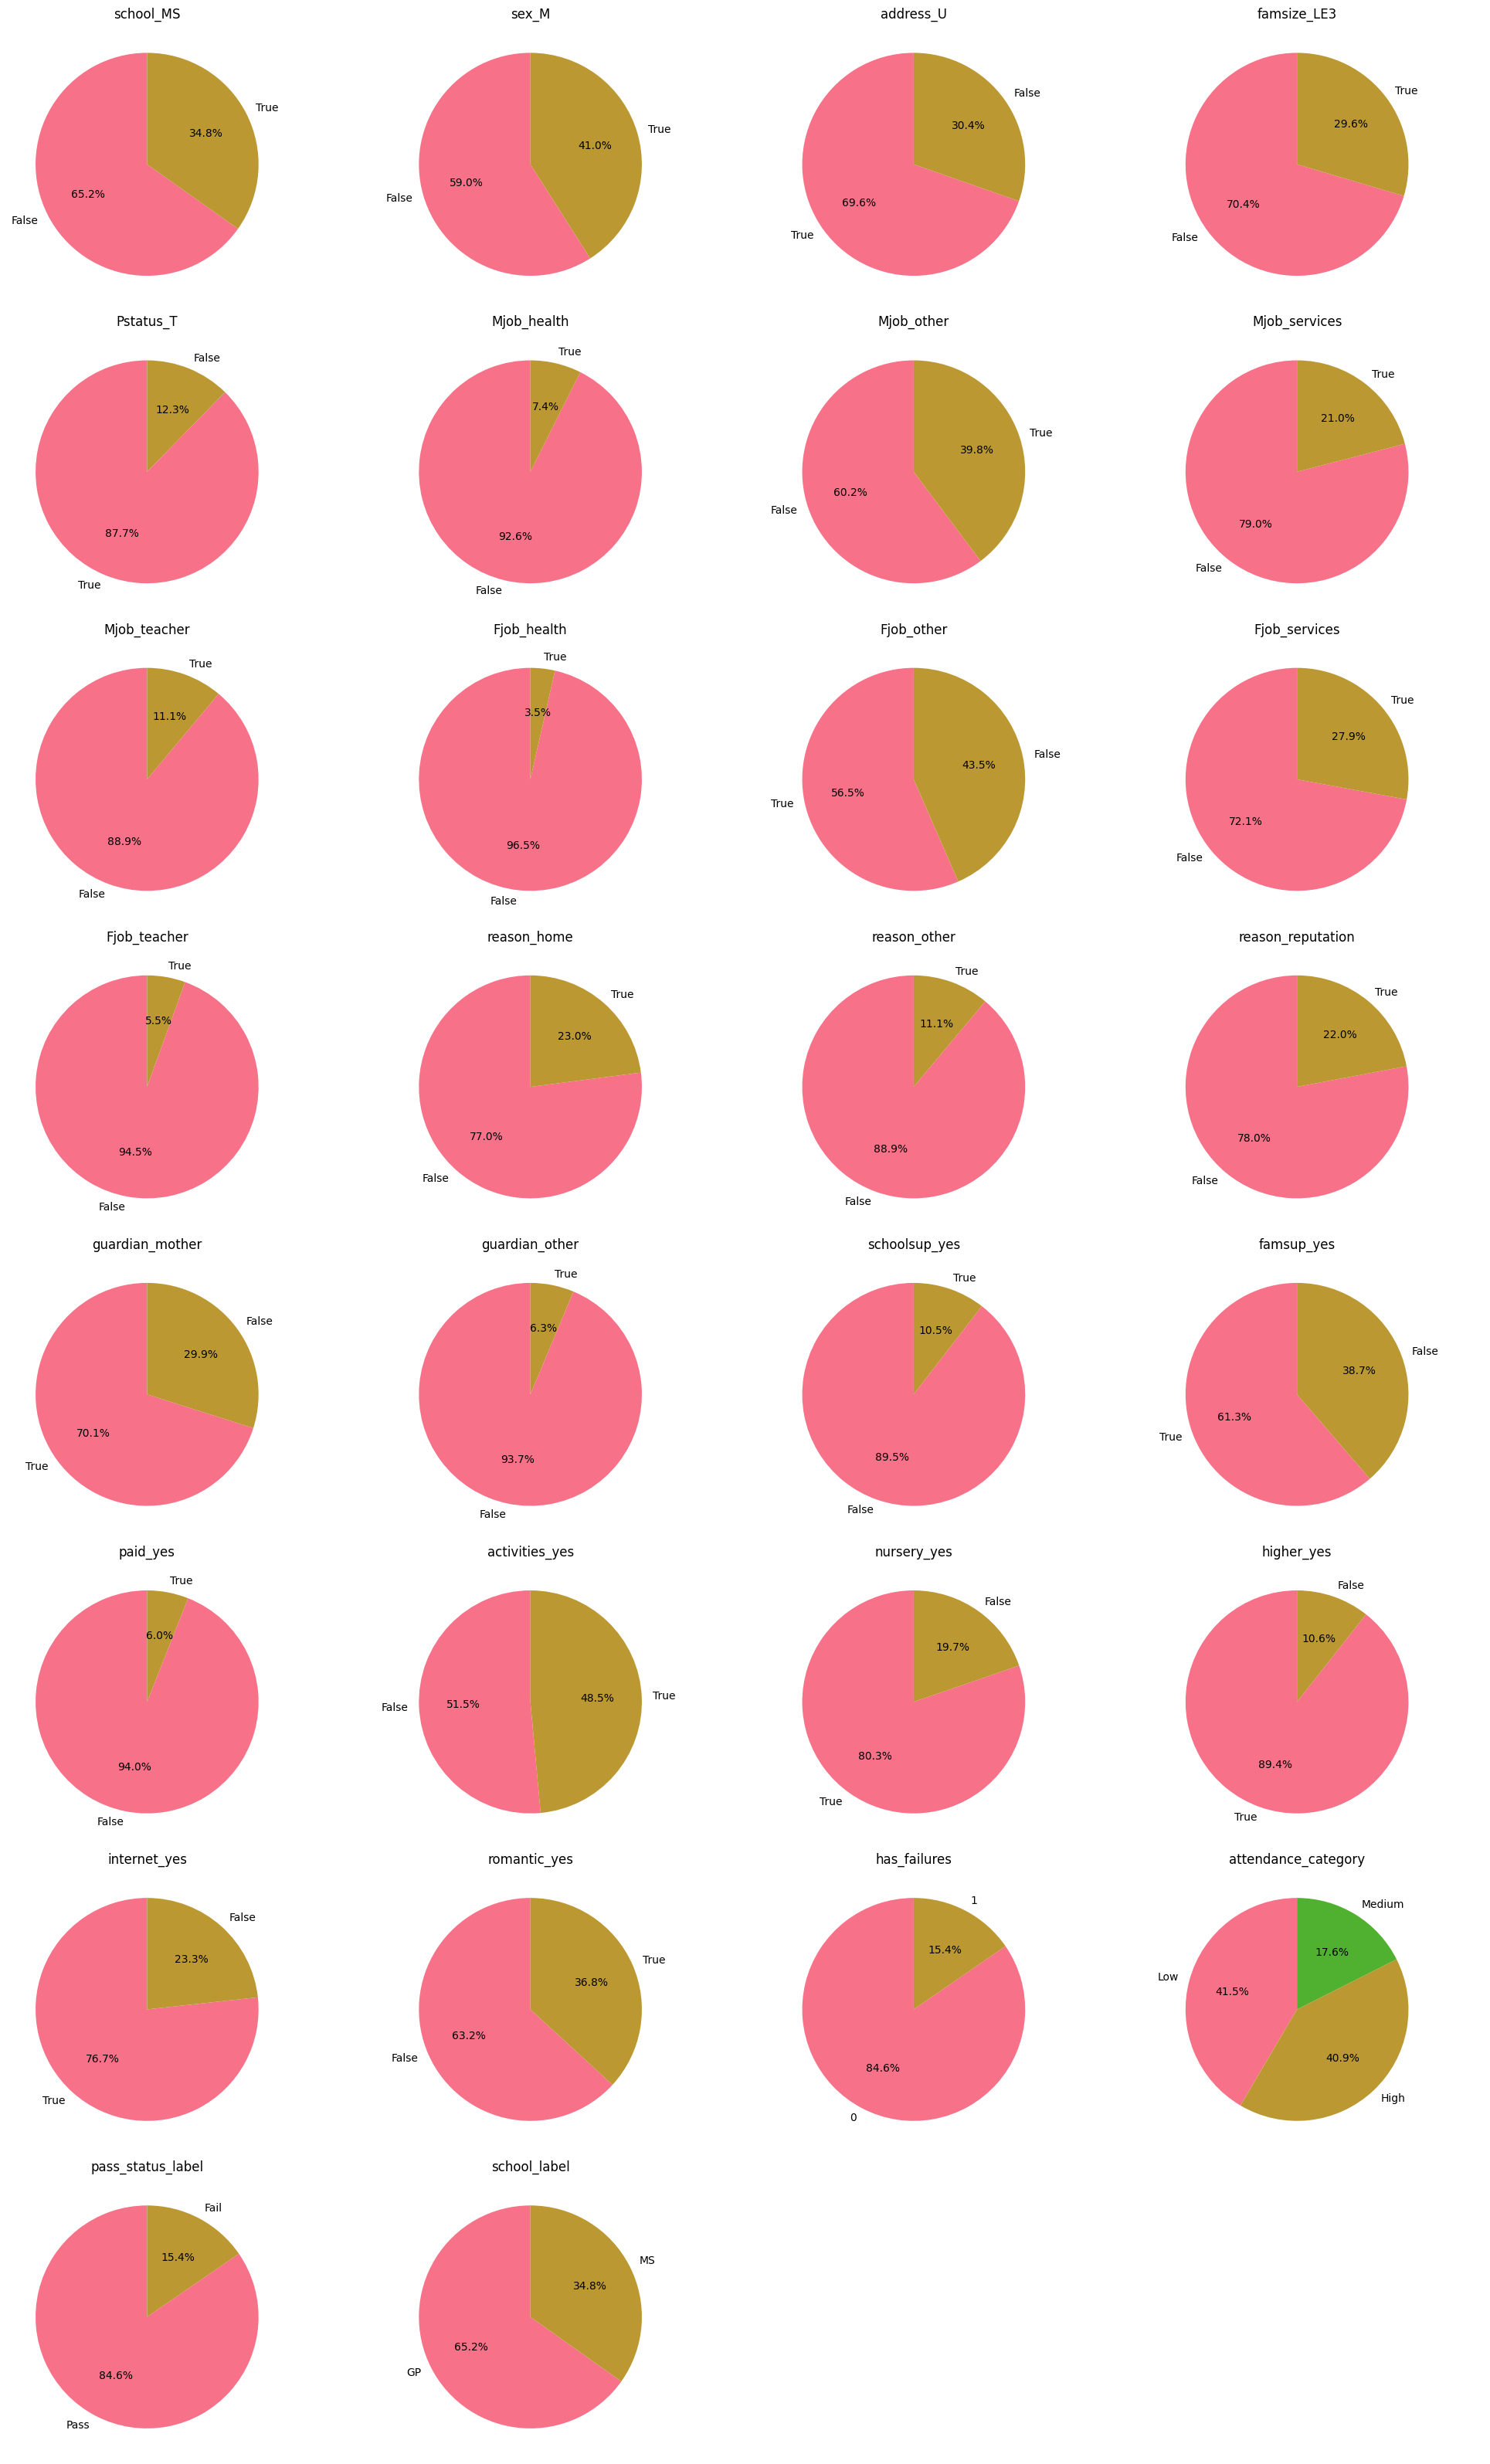

<Figure size 1200x800 with 0 Axes>

In [134]:
# Selecting only categorical columns for pie charts
categorical_columns = [
    "school_MS",
    "sex_M",
    "address_U",
    "famsize_LE3",
    "Pstatus_T",
    "Mjob_health",
    "Mjob_other",
    "Mjob_services",
    "Mjob_teacher",
    "Fjob_health",
    "Fjob_other",
    "Fjob_services",
    "Fjob_teacher",
    "reason_home",
    "reason_other",
    "reason_reputation",
    "guardian_mother",
    "guardian_other",
    "schoolsup_yes",
    "famsup_yes",
    "paid_yes",
    "activities_yes",
    "nursery_yes",
    "higher_yes",
    "internet_yes",
    "romantic_yes",
    "has_failures",
    "attendance_category",
    "pass_status_label",
    "school_label",
]

n_cols = 4
n_rows = (len(categorical_columns) + n_cols - 1) // n_cols

fig, axes = plt.subplots(n_rows, n_cols, figsize=(20, n_rows * 4))
axes = axes.flatten()

for i, col in enumerate(categorical_columns):
    df[col].value_counts().plot.pie(
        autopct="%1.1f%%", ax=axes[i], startangle=90, legend=False, ylabel=""
    )
    axes[i].set_title(col)

# Hide any unused subplots
for j in range(i + 1, len(axes)):
    axes[j].axis("off")

plt.tight_layout()
plt.show()

plt.savefig("categorical-columns-for-pie.png")

In [120]:
# Prepare mapped dataframe
avg_grades = df.groupby(["school_MS", "sex_M"])["G3"].mean().reset_index()

avg_grades["school_label"] = avg_grades["school_MS"].map({False: "GP", True: "MS"})
avg_grades["gender_label"] = avg_grades["sex_M"].map({False: "Female", True: "Male"})

In [121]:
avg_grades

,school_MS,sex_M,G3,school_label,gender_label
0,False,False,13.004219,GP,Female
1,False,True,12.032258,GP,Male
2,True,False,11.034247,MS,Female
3,True,True,9.950000,MS,Male


In [124]:
# Interactive bar chart for average grades by category
fig = px.bar(
    avg_grades,
    x="school_label",
    y="G3",
    color="gender_label",
    barmode="group",
    text_auto=".2f",
    title="Average Final Grade by School and Gender",
    labels={
        "school_label": "School",
        "G3": "Average Final Grade",
        "gender_label": "Gender",
    },
    color_discrete_map={"Male": "blue", "Female": "red"},
)

fig.show()
fig.write_image("interactive_bar_for_average_grades.png")

In [ ]:
# Create Sankey diagram to show flow between study time, risk categories, and final outcomes
import plotly.graph_objects as go

# Create node labels
study_labels = [f"Study_{i}" for i in df["studytime"].unique()]
risk_labels = [f"Risk_{i}" for i in df["risk_category"].unique()]
outcome_labels = ["Pass", "Fail"]

# Combine all labels
labels = study_labels + risk_labels + outcome_labels

# Create source-target pairs and values
source = []
target = []
value = []

# Study Time to Risk Category
for i, study in enumerate(df["studytime"].unique()):
    for j, risk in enumerate(df["risk_category"].unique()):
        count = len(df[(df["studytime"] == study) & (df["risk_category"] == risk)])
        if count > 0:
            source.append(i)
            target.append(len(study_labels) + j)
            value.append(count)

# Risk Category to Outcome
for i, risk in enumerate(df["risk_category"].unique()):
    for j, outcome in enumerate([1, 0]):  # Pass = 1, Fail = 0
        count = len(df[(df["risk_category"] == risk) & (df["pass_binary"] == outcome)])
        if count > 0:
            source.append(len(study_labels) + i)
            target.append(len(study_labels) + len(risk_labels) + j)
            value.append(count)

# Create Sankey diagram
fig = go.Figure(
    data=[
        go.Sankey(
            node=dict(
                pad=15,
                thickness=20,
                line=dict(color="black", width=0.5),
                label=labels,
                color="blue",
            ),
            link=dict(source=source, target=target, value=value),
        )
    ]
)

# Update layout
fig.update_layout(
    title_text="Student Flow: Study Time → Risk Category → Final Outcome",
    font_size=10,
    height=600,
)

fig.show()
fig.write_image("student_flow_sankey.png", scale=2)

4.8 VISUALIZATION SUMMARY


In [9]:
print(f"\n" + "=" * 60)
print("DATA VISUALIZATION SUMMARY")
print("=" * 60)

print(f"\nVISUALIZATIONS CREATED:")
print("✓ Histograms of key numeric variables")
print("✓ Boxplot: G3 grades by study time")
print("✓ Scatterplot: Absences vs final grade")
print("✓ Correlation heatmap of numeric features")
print("✓ Pass/fail analysis by key factors")
print("✓ Grade distribution by risk category")
print("✓ Q-Q plot for grade normality analysis")
print("✓ Interactive performance dashboard")
print("✓ Student flow Sankey diagram")

print(f"\nKEY VISUAL INSIGHTS:")

# Generate insights based on the visualizations
insights = []

if "G3" in df.columns:
    grade_mean = df["G3"].mean()
    grade_std = df["G3"].std()
    insights.append(f"Grade distribution: Mean={grade_mean:.1f}, Std={grade_std:.1f}")

if "studytime" in df.columns and "G3" in df.columns:
    study_effect = (
        df.groupby("studytime")["G3"].mean().max()
        - df.groupby("studytime")["G3"].mean().min()
    )
    insights.append(
        f"Study time effect: {study_effect:.1f} point difference between highest and lowest study groups"
    )

if "absences" in df.columns and "G3" in df.columns:
    abs_corr = df["absences"].corr(df["G3"])
    if abs_corr < -0.2:
        insights.append(
            f"Clear negative impact of absences on grades (r={abs_corr:.3f})"
        )
    else:
        insights.append(
            f"Weak relationship between absences and grades (r={abs_corr:.3f})"
        )

if "pass_binary" in df.columns:
    pass_rate = df["pass_binary"].mean()
    insights.append(f"Overall pass rate: {pass_rate:.1%}")

# Add normality test insight
statistic, p_value = stats.normaltest(df["G3"])
insights.append(
    f"Grade normality test: {'Normal' if p_value > 0.05 else 'Non-normal'} distribution (p={p_value:.3f})"
)

for i, insight in enumerate(insights, 1):
    print(f"{i}. {insight}")

print(f"\nVISUAL STORYTELLING INSIGHTS:")
print("• Grade distributions show clear patterns across different student segments")
print("• Study time has a measurable positive impact on academic performance")
print("• Multiple behavioral factors correlate with academic success")
print("• Risk categorization effectively segments students by performance level")
print("• Student flow analysis reveals critical transition points in academic journey")
print("• Interactive dashboard provides comprehensive performance overview")


print(f"\n" + "=" * 60)
print("DATA VISUALIZATION COMPLETE ✓")
print("=" * 60)


DATA VISUALIZATION SUMMARY

VISUALIZATIONS CREATED:
✓ Histograms of key numeric variables
✓ Boxplot: G3 grades by study time
✓ Scatterplot: Absences vs final grade
✓ Correlation heatmap of numeric features
✓ Pass/fail analysis by key factors
✓ Grade distribution by risk category
✓ Q-Q plot for grade normality analysis
✓ Interactive performance dashboard
✓ Student flow Sankey diagram

KEY VISUAL INSIGHTS:
1. Grade distribution: Mean=11.9, Std=3.2
2. Study time effect: 2.4 point difference between highest and lowest study groups
3. Weak relationship between absences and grades (r=-0.099)
4. Overall pass rate: 84.6%
5. Grade normality test: Non-normal distribution (p=0.000)

VISUAL STORYTELLING INSIGHTS:
• Grade distributions show clear patterns across different student segments
• Study time has a measurable positive impact on academic performance
• Multiple behavioral factors correlate with academic success
• Risk categorization effectively segments students by performance level
• Stude